In [1]:
# Basic Data Science Packages
import numpy as np
import pandas as pd

#ML scikit learn SVR
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
  
#Plotting graph
import matplotlib.pyplot as plt

#Normalization of data
from sklearn.preprocessing import StandardScaler

#Utility Module for computing and displaying metrics
from utility_functions import metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
thesis_dataset = pd.read_csv('data/final_thesis_dataset.csv',parse_dates=[0], index_col=0)

train = thesis_dataset[:6098] 
test = thesis_dataset[6098:] 

X_solar_train = train[['SWTDN', 'SWGDN', 'T']]
y_solar_train = train['DE_solar_generation_actual']
X_solar_test = test[['SWTDN', 'SWGDN', 'T']]
y_solar_test = test['DE_solar_generation_actual']

X_wind_train = train[['v1', 'v2', 'v_50m', 'z0']]
y_wind_train = train['DE_wind_generation_actual']
X_wind_test = test[['v1', 'v2', 'v_50m', 'z0']]
y_wind_test = test['DE_wind_generation_actual']

In [13]:
param_grid = {  
    'bootstrap': [True], 
    'max_depth': [5, 10, None], 
    'max_features': ['auto', 'log2'], 
    'n_estimators': [5, 6, 10, 11, 15]
}

rfr = RandomForestRegressor(random_state = 1)

grid = GridSearchCV(estimator = rfr, param_grid = param_grid, 
                          cv = 3, n_jobs = 1, verbose = 3, return_train_score=True)

grid.fit(X_solar_train, y_solar_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] bootstrap=True, max_depth=5, max_features=auto, n_estimators=5 ..
[CV]  bootstrap=True, max_depth=5, max_features=auto, n_estimators=5, score=(train=0.972, test=0.891), total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=auto, n_estimators=5 ..
[CV]  bootstrap=True, max_depth=5, max_features=auto, n_estimators=5, score=(train=0.972, test=0.951), total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=auto, n_estimators=5 ..
[CV]  bootstrap=True, max_depth=5, max_features=auto, n_estimators=5, score=(train=0.964, test=0.961), total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=auto, n_estimators=6 ..
[CV]  bootstrap=True, max_depth=5, max_features=auto, n_estimators=6, score=(train=0.973, test=0.891), total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=auto, n_estimators=6 ..
[CV]  bootstrap=True, max_depth=5, max_features=auto, n_estimators=6, score=(train=0.972, test=0.951), total=   0.0s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] bootstrap=True, max_depth=5, max_features=auto, n_estimators=10 .
[CV]  bootstrap=True, max_depth=5, max_features=auto, n_estimators=10, score=(train=0.973, test=0.891), total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=auto, n_estimators=10 .
[CV]  bootstrap=True, max_depth=5, max_features=auto, n_estimators=10, score=(train=0.972, test=0.952), total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=auto, n_estimators=10 .
[CV]  bootstrap=True, max_depth=5, max_features=auto, n_estimators=10, score=(train=0.964, test=0.961), total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=auto, n_estimators=11 .
[CV]  bootstrap=True, max_depth=5, max_features=auto, n_estimators=11, score=(train=0.973, test=0.891), total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=auto, n_estimators=11 .
[CV]  bootstrap=True, max_depth=5, max_features=auto, n_estimators=11, score=(train=0.972, test=0.952), total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=auto, n

[CV]  bootstrap=True, max_depth=10, max_features=log2, n_estimators=10, score=(train=0.980, test=0.954), total=   0.0s
[CV] bootstrap=True, max_depth=10, max_features=log2, n_estimators=11 
[CV]  bootstrap=True, max_depth=10, max_features=log2, n_estimators=11, score=(train=0.985, test=0.888), total=   0.0s
[CV] bootstrap=True, max_depth=10, max_features=log2, n_estimators=11 
[CV]  bootstrap=True, max_depth=10, max_features=log2, n_estimators=11, score=(train=0.987, test=0.948), total=   0.0s
[CV] bootstrap=True, max_depth=10, max_features=log2, n_estimators=11 
[CV]  bootstrap=True, max_depth=10, max_features=log2, n_estimators=11, score=(train=0.980, test=0.956), total=   0.0s
[CV] bootstrap=True, max_depth=10, max_features=log2, n_estimators=15 
[CV]  bootstrap=True, max_depth=10, max_features=log2, n_estimators=15, score=(train=0.986, test=0.890), total=   0.0s
[CV] bootstrap=True, max_depth=10, max_features=log2, n_estimators=15 
[CV]  bootstrap=True, max_depth=10, max_features=l

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    4.8s finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1), n_jobs=1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 6, 10, 11, 15]},
             return_train_score=True, verbose=3)

In [10]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 15}
RandomForestRegressor(max_depth=5, n_estimators=15, random_state=1)


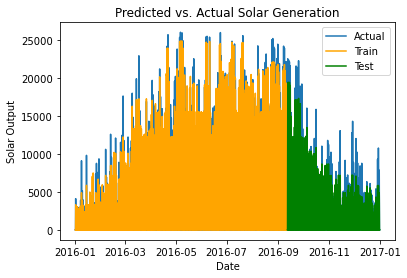

In [5]:
train_solar_pred = grid.predict(X_solar_train)
test_solar_pred = grid.predict(X_solar_test)

df = thesis_dataset[['DE_solar_generation_actual']]

train_df = train[['DE_solar_generation_actual']]
train_df.loc[:, 'DE_solar_generation_actual'] = train_solar_pred

test_df = test[['DE_solar_generation_actual']]
test_df.loc[:, 'DE_solar_generation_actual'] = test_solar_pred

# Plot all predictions
inversetransform, =plt.plot(df, label = 'Actual')
trainpredx, =plt.plot(train_df, color='orange', label = 'Train')
testpredx, =plt.plot(test_df, color='green', label = 'Test')
plt.xlabel('Date')
plt.ylabel('Solar Output')
plt.legend(loc="upper right")
plt.title("Predicted vs. Actual Solar Generation")
plt.show()

In [6]:
metrics('svm+rbf', test[['DE_solar_generation_actual']], test_solar_pred)

,MAE,MSE,RMSE,RMSLE,R2
model,,,,,
svm+rbf,503.531115,1166.470082,34.153625,3.530869,0.918342
